In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
data = pd.read_csv("OnlineNewsPopularity.csv")

# Clean the column names
data.columns = data.columns.str.strip()

# Create a binary target variable
median_shares = data['shares'].median()
data['popularity'] = (data['shares'] >= median_shares).astype(int)

# Check class distribution
print("Class Distribution:")
print(data['popularity'].value_counts())

Class Distribution:
popularity
1    21154
0    18490
Name: count, dtype: int64


In [3]:
# Create binary target variable
median_shares = data['shares'].median()
data['popularity'] = (data['shares'] >= median_shares).astype(int)

# Separate features and target
features = data.drop(columns=['url', 'shares', 'popularity'])
target = data['popularity']

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution
print("Original Training Set Distribution:")
print(y_train.value_counts())

print("\nBalanced Training Set Distribution:")
print(pd.Series(y_train_balanced).value_counts())

Original Training Set Distribution:
popularity
1    16923
0    14792
Name: count, dtype: int64

Balanced Training Set Distribution:
popularity
1    16923
0    16923
Name: count, dtype: int64


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.94      0.64      3698
           1       0.69      0.13      0.21      4231

    accuracy                           0.50      7929
   macro avg       0.59      0.53      0.43      7929
weighted avg       0.60      0.50      0.41      7929

Naive Bayes Training Accuracy: 0.50
Naive Bayes Testing Accuracy: 0.50


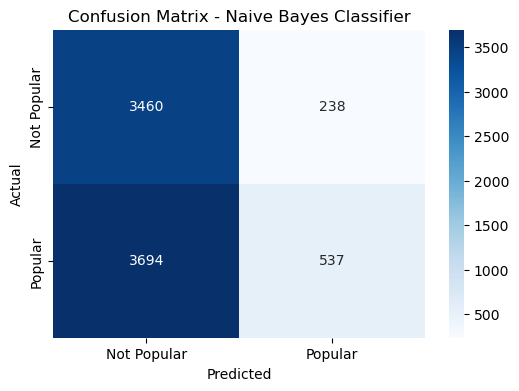

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the training and testing datasets
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

# Calculate accuracy
train_accuracy_nb = accuracy_score(y_train, y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test, y_pred_test_nb)

# Print classification report and accuracy
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_test_nb))
print(f"Naive Bayes Training Accuracy: {train_accuracy_nb:.2f}")
print(f"Naive Bayes Testing Accuracy: {test_accuracy_nb:.2f}")

# Plot confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_test_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      3698
           1       0.68      0.64      0.66      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.65      0.64      0.64      7929

SVM Training Accuracy: 0.65
SVM Testing Accuracy: 0.64


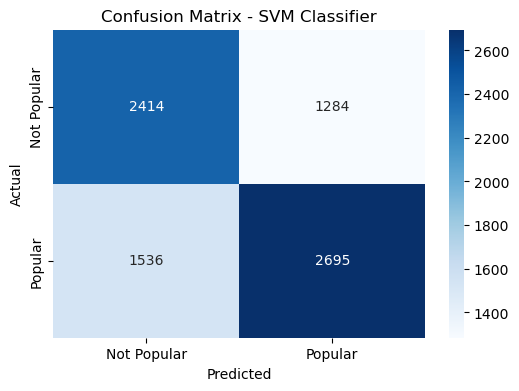

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train an SVM Classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # You can experiment with kernel types like 'rbf', 'poly', etc.
svm_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_train_svm = svm_model.predict(X_train_balanced)
y_pred_test_svm = svm_model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy_svm = accuracy_score(y_train_balanced, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

# Print classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_test_svm))
print(f"SVM Training Accuracy: {train_accuracy_svm:.2f}")
print(f"SVM Testing Accuracy: {test_accuracy_svm:.2f}")

# Plot confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_test_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      3698
           1       0.65      0.55      0.59      4231

    accuracy                           0.60      7929
   macro avg       0.61      0.61      0.60      7929
weighted avg       0.61      0.60      0.60      7929

KNN Training Accuracy: 0.75
KNN Testing Accuracy: 0.60


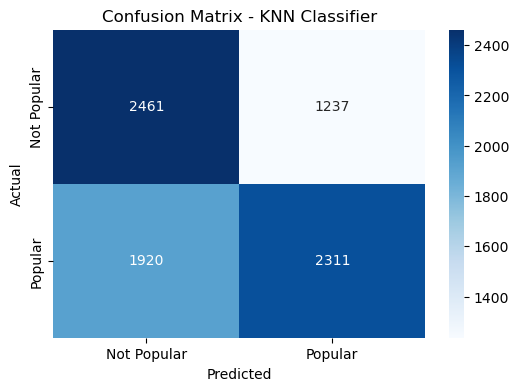

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors as needed
knn_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_train_knn = knn_model.predict(X_train_balanced)
y_pred_test_knn = knn_model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy_knn = accuracy_score(y_train_balanced, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

# Print classification report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_test_knn))
print(f"KNN Training Accuracy: {train_accuracy_knn:.2f}")
print(f"KNN Testing Accuracy: {test_accuracy_knn:.2f}")

# Plot confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()
